<center>

<h1>

**_Marketing Analytics_**

**_Homework 2: A/B testing_**

**Anna Aghaloyan**

</h1>

</center>


# Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd
import warnings
import random
random.seed(5)
warnings.filterwarnings("ignore")

# Define parameters 

In [2]:
num_trials = 20000
bandit_rewards_list = [1,2,3,4]

In [3]:
"""
  Run this file at first, in order to see what is it printng. Instead of the print() use the respective log level
"""
############################### LOGGER
from abc import ABC, abstractmethod
from logs import *

logging.basicConfig
logger = logging.getLogger("MAB Application")


# create console handler with a higher log level
ch = logging.StreamHandler()
ch.setLevel(logging.DEBUG)

ch.setFormatter(CustomFormatter())

logger.addHandler(ch)



class Bandit(ABC):
    ##==== DO NOT REMOVE ANYTHING FROM THIS CLASS ====##

    @abstractmethod
    def __init__(self, p):
        pass

    @abstractmethod
    def __repr__(self):
        pass

    @abstractmethod
    def pull(self):
        pass

    @abstractmethod
    def update(self):
        pass

    @abstractmethod
    def experiment(self):
        pass

    @abstractmethod
    def report(self):
        # store data in csv
        # log average reward (use f strings to make it informative)
        # log average regret (use f strings to make it informative)
        pass

#--------------------------------------#



class Visualization():

    def plot1(self):
        # Visualize the performance of each bandit: linear and log
        pass

    def plot2(self):
        # Compare E-greedy and thompson sampling cummulative rewards
        # Compare E-greedy and thompson sampling cummulative regrets
        pass



#--------------------------------------#

class EpsilonGreedy(Bandit):
    """
    """
    pass

#--------------------------------------#

class ThompsonSampling(Bandit):
    "logg"
    pass




def comparison():
    # think of a way to compare the performances of the two algorithms VISUALLY and 
    pass

if __name__=='__main__':
   
    logger.debug("debug message")
    logger.info("info message")
    logger.warning("warning message")
    logger.error("error message")
    logger.critical("critical message")


2024-11-17 15:44:54,593 - MAB Application - WARNING - warning message (line: 93)
2024-11-17 15:44:54,594 - MAB Application - ERROR - error message (line: 94)
2024-11-17 15:44:54,595 - MAB Application - CRITICAL - critical message (line: 95)


In [5]:
class EpsilonGreedyBandit:
    """
    Represents an Epsilon Greedy bandit.
    
    Attributes:
        reward (float): The true reward of the bandit.
    Methods:
        pull(): Pulls a value for the bandit.
        update(x: float): Updates the estimated reward of the bandit.
        plot1(): Plots the learning process of the bandits.
        experiment(bandit_rewards: list, num_trials: int, path_to_save: str, to_save: bool): Run the experiment with given bandits, number of trials and whether to save the results or not.
        report(path_to_save: str, to_save: bool): Prints the report of the experiment.
        create_data(): Creates the dataframe for saving
        update_epsilon(): Updates the epsilon with rate 1/t.
    
    """
    def __init__(self, reward):
        """
        Initializes a new instance of EpsilonGreedyBandit class.
        
        Args:
            reward (float): The true reward of the bandit. 
        
        """
        self.reward = reward     # True reward
        self.reward_estimate = 0.    # Estimation of reward
        self.N = 0    # Iterations 
        self.learning_process = []    # List of learning process 
        self.bandits = None    # List of bandits
        self.epsilon = 1    # Epsilon for start
        self.data = []  # List to store experiment data
        
    def pull(self):
        """
        Pulls a value for the bandit based on the true reward (the value is pulled from normal distribution with mean of true bandit reward and 1 std).
        
        """
        return np.random.normal(self.reward, 1)     # Pull a reward with mean of the true reward and std 1
    
    def update(self, x):
        """
        Updates the estimated reward for the bandit based on the pulled value.
        
        Args:
            x (float): The new value pulled for the bandit to update for the estimated reward.
        
        """
        self.N += 1    # Increase count of iterations by 1
        self.reward_estimate = ((self.N - 1)*self.reward_estimate + x) / self.N    # Update the reward estimate
        self.learning_process.append(self.reward_estimate)    # Add the updated value to the reward list
        
    def __repr__(self):
        """
        String representation of the EpsilonGreedyBandit object.

        Returns
        str: A string representing the EpsilonGreedyBandit object, including its actual reward and estimated reward.
        """
        return f'A bandit with actual reward: {self.reward} and estimated reward {self.reward_estimate}'

    
    def plot1(self):
        """
        Plots the learning curves of all bandits after the experiment.

        Raises:
            Exception: If no experiment has been run.
        """
        if self.bandits is None:
            raise Exception('Run the experiment first')
        
        fig, axs = plt.subplots(2, 2, figsize=(10, 8))
        
        # Add a main title for all subplots
        plt.suptitle('The learning curves of all 4 bandits', size=15)
        
        # Iterate over each bandit and its corresponding subplot
        for (bandit, ax) in zip(self.bandits, axs.ravel()):
            # Plot the learning curve of the bandit
            ax.plot(bandit.learning_process)
            # Set the title of the subplot to display the true reward of the bandit
            ax.set_title(f'True reward: {bandit.reward}')
        
        # Display the plot
        plt.show()
    
    
    def update_epsilon(self, current_iteration, total_trials):
        """
         Updates the epsilon value based on the current iteration and total number of trials.
         
         Args:
         current_iteration (int): The current iteration number.
         total_trials (int): The total number of trials for the experiment.
         """
        self.epsilon = 1 / (current_iteration + 1)


    def experiment(self, bandit_rewards, num_trials, path_to_save='', to_save=False):
        """
        The experiment function that runs the experiment with the given bandit rewards and number of trials.
        
        Args:
            bandit_rewards (list): The true rewards list of bandits.
            num_trials (int): The number of iterations to run the experiment.
            path_to_save (str): The path to save the results.
            to_save (bool): Whether to save the results or not.
            
        """
        if to_save:    # If save, create the dataframe
            self.create_data()
        
        self.bandits = [EpsilonGreedyBandit(reward) for reward in bandit_rewards]    # Initialize the bandit objects in the list
        self.rewards = np.zeros(num_trials)    # Create the rewards list
        self.regret = []   # Regret list
        
        for i in range(num_trials):    # Run the iterations
            if np.random.random() < self.epsilon:    # If the epsilon is high enough, choose a random bandit
                index = np.random.randint(len(self.bandits))
            else:
                index = np.argmax([b.reward_estimate for b in self.bandits])    # If the epsilon is small, choose the optimal bandit

            selected_bandit = self.bandits[index]    # Get the selected bandit
            x = selected_bandit.pull()    # Pull a value from the selected bandit
            
            if to_save:    # If save, add the experiment data to the list
                new_row = {'Bandit': index, 'Reward': x, 'Algorithm': selected_bandit.__class__.__name__}
                self.data.append(new_row)
                
            self.rewards[i] = x    # Add the result to the rewards array
            self.regret.append(selected_bandit.reward - x)    # Get the regret value
            selected_bandit.update(x)    # Update the estimated reward for the bandit
            self.update_epsilon(i, num_trials)    # Update the epsilon 

        self.report(path_to_save, to_save)    # Call the report function
        return self.rewards

    
    def report(self, path_to_save, to_save=False):
        """
        The report function that prints the report for the experiment.
        
        Args:
            path_to_save (str): The path to save the results of the experiment.
            to_save (bool): Whether to save the results or not.
        
        """
        print(' '*45 +'\033[1m' + 'Report' + '\033[0m')
        if self.bandits is None:     # If no experiment done before, raise an exception
            raise Exception('Run the experiment first')
             
        # Part1 - plot the learning curves 
        print('\n-= Part 1 =-')
        self.plot1()
        
        # Part2 - plot the cumulative rewards
        print('\n-= Part 2 =-')
        cumulative_rewards = np.cumsum(self.rewards)
        plt.plot(cumulative_rewards)
        plt.title('Plot of cumulative rewards\n', size = 15)
        plt.show()
        
        # Part3 - if save, save the data
        if to_save:
            df = pd.DataFrame(self.data)
            df.to_csv(path_to_save, index=False)
            
        # Part4 - print the cumulative reward
        cumulative_reward = cumulative_rewards[-1]
        print(f'The sum reward for the experiment is {cumulative_reward}')
        print(f'The cumulative reward for the experiment is {cumulative_rewards}')
        
        # Part5 - print the cumulative regret
        cumulative_regrets = np.cumsum(self.regret)
        cumulative_regret = cumulative_regrets[-1]
        print(f'\nThe sum of regret for the experiment is {cumulative_regret}')
        print(f'The cumulative regret for the experiment is {cumulative_regrets}')
        
    def create_data(self):
        """
        Creates the dataset for storing the data.
        
        """
        print('The dataframe for storing data is created.')

        



The dataframe for storing data is created.
                                             Report

-= Part 1 =-


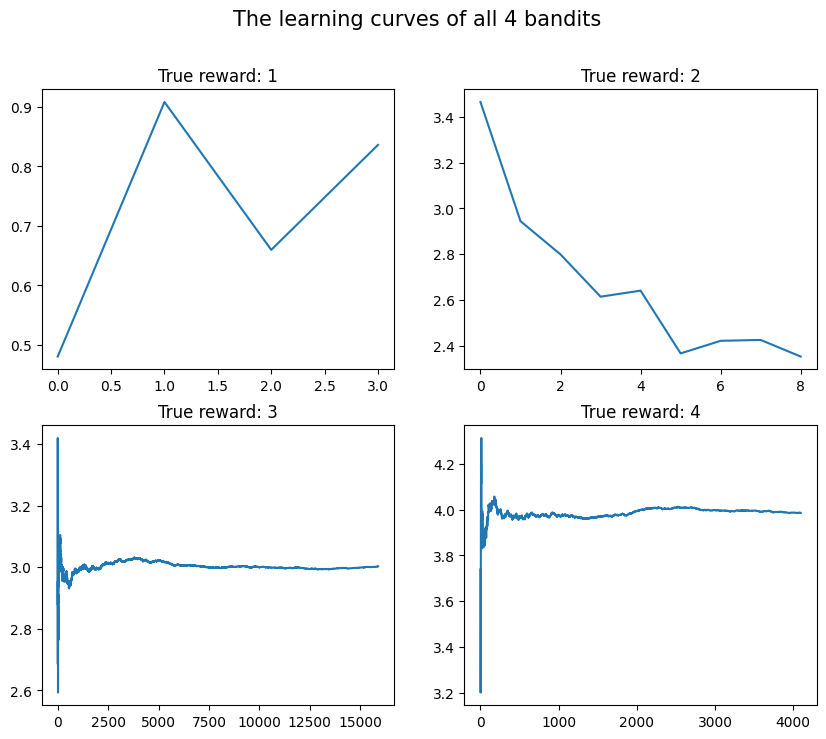


-= Part 2 =-


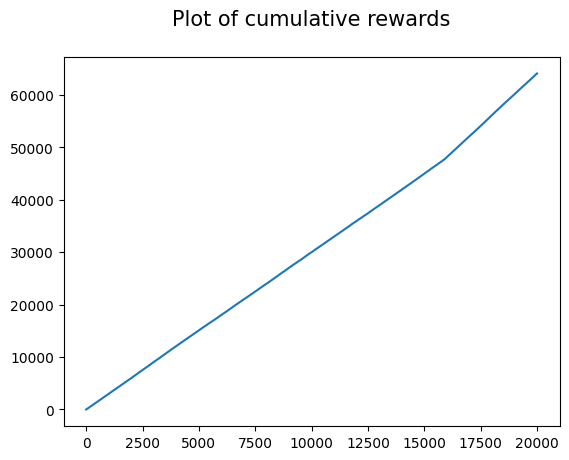

The sum reward for the experiment is 64066.284412247165
The cumulative reward for the experiment is [4.80356695e-01 3.94473559e+00 6.36879745e+00 ... 6.40596093e+04
 6.40622007e+04 6.40662844e+04]

The sum of regret for the experiment is 12.71558775303128
The cumulative regret for the experiment is [ 0.51964331 -0.94473559 -1.36879745 ... 11.39066061 12.79930155
 12.71558775]


In [7]:
epsilon = 0.01
eg_bandit = EpsilonGreedyBandit(epsilon)
eg_rewards = eg_bandit.experiment(bandit_rewards_list, num_trials, 'epsilon_greedy_reward.csv', to_save=True)

In [8]:
class ThompsonSamplingBandit(Bandit):
    """ 
    Represents a Thompson Sampling bandit with the following attributes and methods.
    
    Attributes:
        reward (float): The true reward of the bandit.
    Methods:
        pull(): Pulls a value for the bandit.
        sample(): Samples a value from the estimated reward.
        update(x: float): Updates the estimated reward of the bandit.
        plot1(): Plots the learning process of the bandits.
        experiment(bandit_rewards: list, num_trials: int, path_to_save: str, to_save: bool): Run the experiment with given bandits, number of trials and whether to save the results or not.
        report(path_to_save: str, to_save: bool): Prints the report of the experiment.
        create_data(): Creates the dataframe for saving.
        update_epsilon(): Updates the epsilon with rate 1/t.
    """
    def __init__(self, reward):
        """
        Initializes a new instance of ThompsonSamplingBandit class with the following arguments:
        
        Args:
            reward (float): The true reward of the bandit. 
        
        """
        self.reward = reward    # The true reward
        self.m = 0              # The estimated reward
        self.lambda_ = 1        # Parameter lambda
        self.tau = 1            # Parameter tau
        self.N = 0              # Iteration count
        self.sum_x = 0          # Cumulative reward
        self.learning_process = []    # Learning process list

    def pull(self):
        """
        Pulls a value for the bandit based on the true reward.
        """
        return np.random.randn() / np.sqrt(self.tau) + self.reward
    
    def sample(self):
        """
        Samples a value for the bandit based on the estimated reward.
        """
        return np.random.randn() / np.sqrt(self.lambda_) + self.m
    
    def update(self, x):
        """
        Updates the estimated reward for the bandit based on the new, pulled value.
        
        Args:
            x (float): The new value pulled for the bandit, the value to update for the estimated reward.
        
        """
        self.lambda_ += self.tau    # Update lambda
        self.sum_x += x                     # Update the cumulative sum
        self.m = (self.tau * self.sum_x) / self.lambda_    # Update the reward estimate
        self.learning_process.append(self.m)    # Update learning process list
        self.N += 1                        # Increment iteration count

        
    def __repr__(self):
        return f'A bandit with actual reward: {self.reward} and estimated reward {self.m}'
    
    def plot1(self):
        """
        Plots the learning curves after the experiment for the existing bandits. Creates a subplot of all the bandits learning curves.
        
        """
        fig, axs = plt.subplots(2, 2, figsize = (10, 8))
        plt.suptitle('The learning curves of all 4 bandits', size=15)
        for index, bandit in enumerate(self.bandits):
            x_index = index // 2
            y_index = index%2
            axs[x_index, y_index].plot(bandit.learning_process)
            axs[x_index, y_index].set_title(f'True reward: {bandit.reward}')
        plt.show()
            
    def experiment(self, bandit_rewards, num_trials, path_to_save, to_save=False):
        """
        The experiment function that runs the experiment with the given bandit rewards and number of trials.
        
        Args:
            bandit_rewards (list): The true rewards list of bandits.
            num_trials (int): The number of iterations to run the experiment.
            path_to_save (str): The path to save the results.
            to_save (bool): Whether to save the results or not.
            
        """
        if to_save:    # If save create data
            self.create_data()
        self.bandits = [ThompsonSamplingBandit(reward) for reward in bandit_rewards]    # Initialize bandits
        self.rewards = np.zeros(num_trials)    # Create reward array
        self.regret = []
        data_to_append = []  # Create a list to store data

        for i in range(num_trials):
            index = np.argmax([b.sample() for b in self.bandits])  # Sample from bandit rewards
            selected_bandit = self.bandits[index]
            x = selected_bandit.pull()
            if to_save:
                new_row = {'Bandit': index, 'Reward': x, 'Algorithm': selected_bandit.__class__.__name__}
                data_to_append.append(new_row)  # Append row to list
            self.rewards[i] = x
            self.regret.append(selected_bandit.reward - x)
            selected_bandit.update(x)
        if to_save:
            self.data = pd.concat([self.data, pd.DataFrame(data_to_append)], ignore_index=True)  # Concatenate DataFrame
        self.report(path_to_save, to_save)
        return self.rewards

    def report(self, path_to_save, to_save=False):
        """
        Prints the report for the experiment.

        Args:
            path_to_save (str): The path to save the results of the experiment.
            to_save (bool): Whether to save the results or not.
        """
        # Print the report title
        print('\n' + ' ' * 20 + 'Experiment Report')

        # Check if the experiment has been run
        if self.bandits is None:
            raise Exception('Run the experiment first')
             
        # Part 1: Plot the learning curves
        print('\n' + ' ' * 20 + 'Learning Curves')

        self.plot1()
        
        # Part 2: Plot the cumulative rewards
        print('\n' + ' ' * 20 + 'Cumulative rewards')

        cumulative_rewards = np.cumsum(self.rewards)
        plt.plot(cumulative_rewards)
        plt.title('Cumulative Rewards Plot\n', size=15)
        plt.xlabel('Trials')
        plt.ylabel('Cumulative Reward')
        plt.show()
        
        # Part 3: Save the data if required
        if to_save:
            self.data.to_csv(path_to_save, index=False)
            print('\n' + ' ' * 20 + f'Data saved to {path_to_save}')
            
        # Part 4: Print the cumulative reward
        cumulative_reward = cumulative_rewards[-1]
        print('\n' + ' ' * 20 + 'Summary')
        print(f'- Total reward for the experiment: {cumulative_reward}')
        print(f'- Cumulative reward over trials: {cumulative_rewards}')
        
        # Part 5: Print the cumulative regret
        cumulative_regrets = np.cumsum(self.regret)
        cumulative_regret = cumulative_regrets[-1]
        print('\n' + ' ' * 20 + 'Regret')
        print(f'- Total regret for the experiment: {cumulative_regret}')
        print(f'- Cumulative regret over trials: {cumulative_regrets}')


    def create_data(self):
        """
        Creates the dataset for storing data.
        
        """
        self.data = pd.DataFrame(columns=['Bandit', 'Reward', 'Algorithm'])
        print('Dataframe is created with columns: Bandit, Reward and Column.')


Dataframe is created with columns: Bandit, Reward and Column.
Dataframe is created with columns: Bandit, Reward and Column.

                    Experiment Report

                    Learning Curves


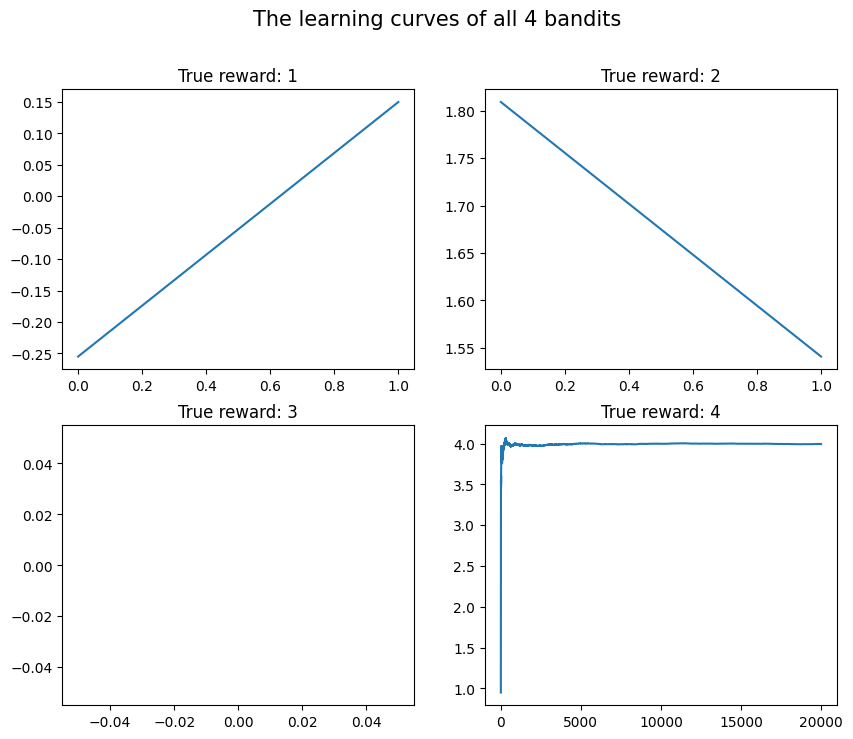


                    Cumulative rewards


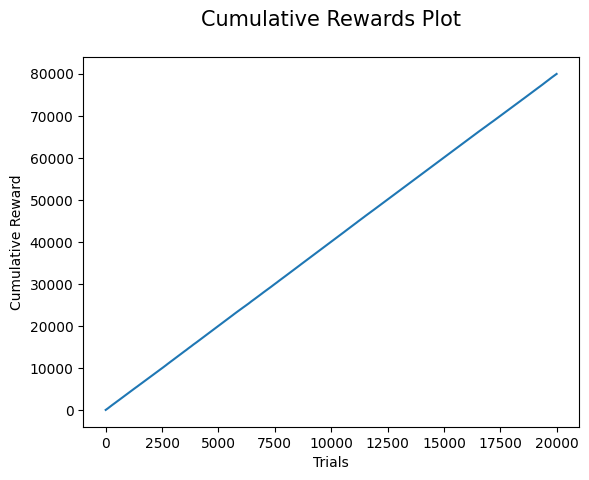


                    Data saved to thompson_sampling_rewards.csv

                    Summary
- Total reward for the experiment: 79916.17021577254
- Cumulative reward over trials: [-5.09988241e-01  4.49684241e-01  2.34567001e+00 ...  7.99109381e+04
  7.99139172e+04  7.99161702e+04]

                    Regret
- Total regret for the experiment: 73.82978422737767
- Cumulative regret over trials: [ 1.50998824  1.55031576  3.65432999 ... 71.061867   72.08280506
 73.82978423]


In [9]:
thompson_bandit = ThompsonSamplingBandit(bandit_rewards_list)  # Instantiate with a specific reward value
thompson_bandit.create_data()  # Initialize self.data
thompson_rewards = thompson_bandit.experiment(bandit_rewards_list, num_trials, 'thompson_sampling_reward.csv', to_save=True)


In [10]:
def comparison(eps_reward, thompson_reward, num_trials):   
    """
    A function for comparing Epsilon Greedy with Thompson Sampling algorithms.
    
    Args:
    
        eps_reward (list): Epsilon rewards.
        thompson_reward(list): Thompson rewards.
        num_trails (int): The number of trials.
    
    """
    plt.plot(np.arange(num_trials), np.cumsum(eps_reward), label='Epsilon-Greedy')
    plt.plot(np.arange(num_trials), np.cumsum(thompson_reward), label='Thompson Sampling')
    plt.xlabel('#Trials')
    plt.ylabel('Estimated Reward')
    plt.title('Comparison of Epsilon-Greedy and Thompson Sampling')
    plt.legend()
    plt.show()

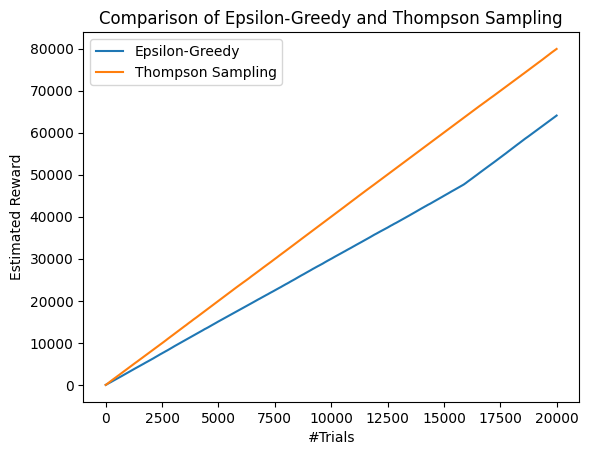

In [11]:
comparison(eg_rewards, thompson_rewards, num_trials)

<center>

<h1>

**Conclusion**

</h1>

</center>


Thompson Sampling and Epsilon-Greedy are both strategies designed to tackle multi-armed bandit problems, where a decision-maker must choose between several options (bandits) to maximize total rewards over time.


The Epsilon-Greedy method is straightforward and intuitive. It involves exploring by randomly selecting a bandit with a probability of epsilon, while exploiting the option with the highest estimated reward based on prior observations with a probability of 1-epsilon. Although simple and effective, this approach may spend excessive time exploring less promising options, especially when epsilon is set too high.


Thompson Sampling, on the other hand, uses a probabilistic approach that maintains a belief distribution over the rewards of each bandit. Rather than choosing the option with the highest estimated reward outright, it samples from these distributions and selects the bandit corresponding to the highest sampled value. This strategy naturally balances exploration and exploitation by adapting its choices to the level of uncertainty in the reward estimates. Consequently, Thompson Sampling often outperforms Epsilon-Greedy, achieving superior results with fewer trials, particularly in environments where rewards are uncertain or dynamic.


In our experiment, Thompson Sampling notably demonstrates a higher estimated reward, showcasing its effectiveness. However, it is worth mentioning that every time we run, there is a random component which can result in different plots. 